In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 633.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.1 MB/s eta 0:00:00
   

In [2]:
#reading the initiate dataset
init_df=pd.read_csv('/content/happydata.csv',on_bad_lines='skip',skipinitialspace = True)

In [3]:
df=init_df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

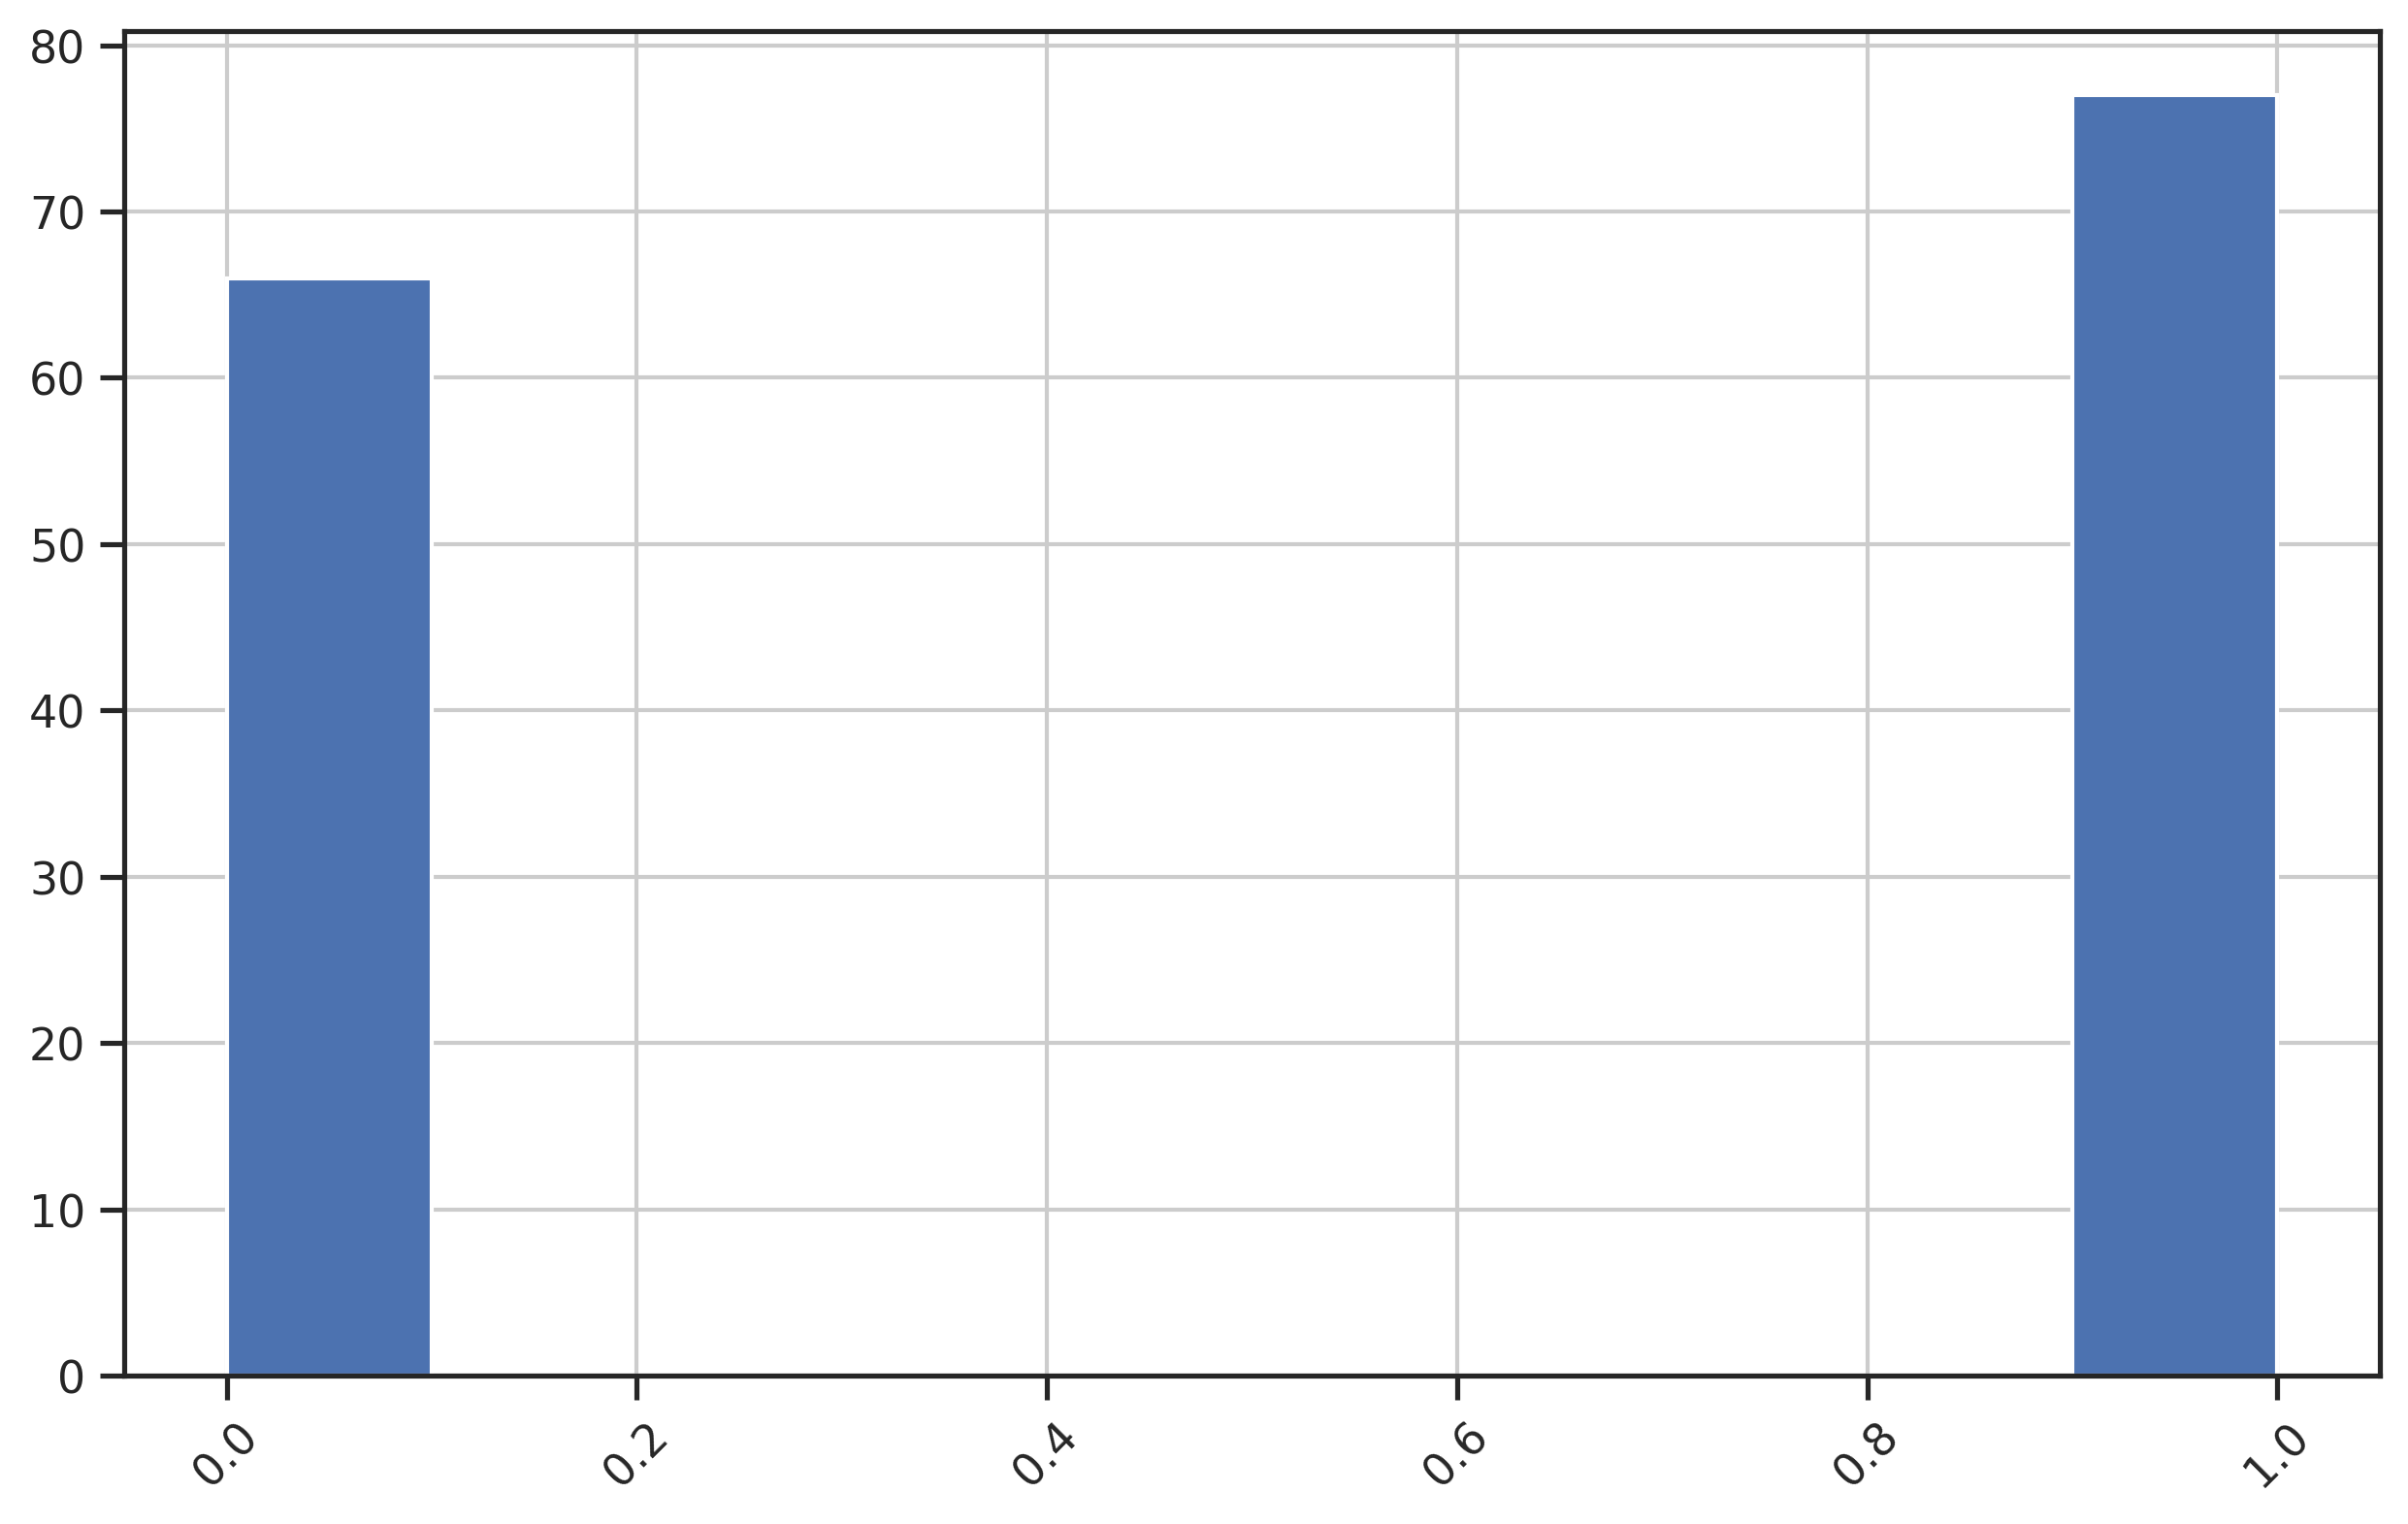

In [31]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
fig = plt.figure(figsize=(10,6))
df['happy'].hist()
plt.xticks(rotation=45)

In [32]:
import warnings
warnings.filterwarnings('ignore')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'infoavail'),
  Text(1, 0, 'housecost'),
  Text(2, 0, 'schoolquality'),
  Text(3, 0, 'policetrust'),
  Text(4, 0, 'streetquality'),
  Text(5, 0, 'ëvents'),
  Text(6, 0, 'happy')])

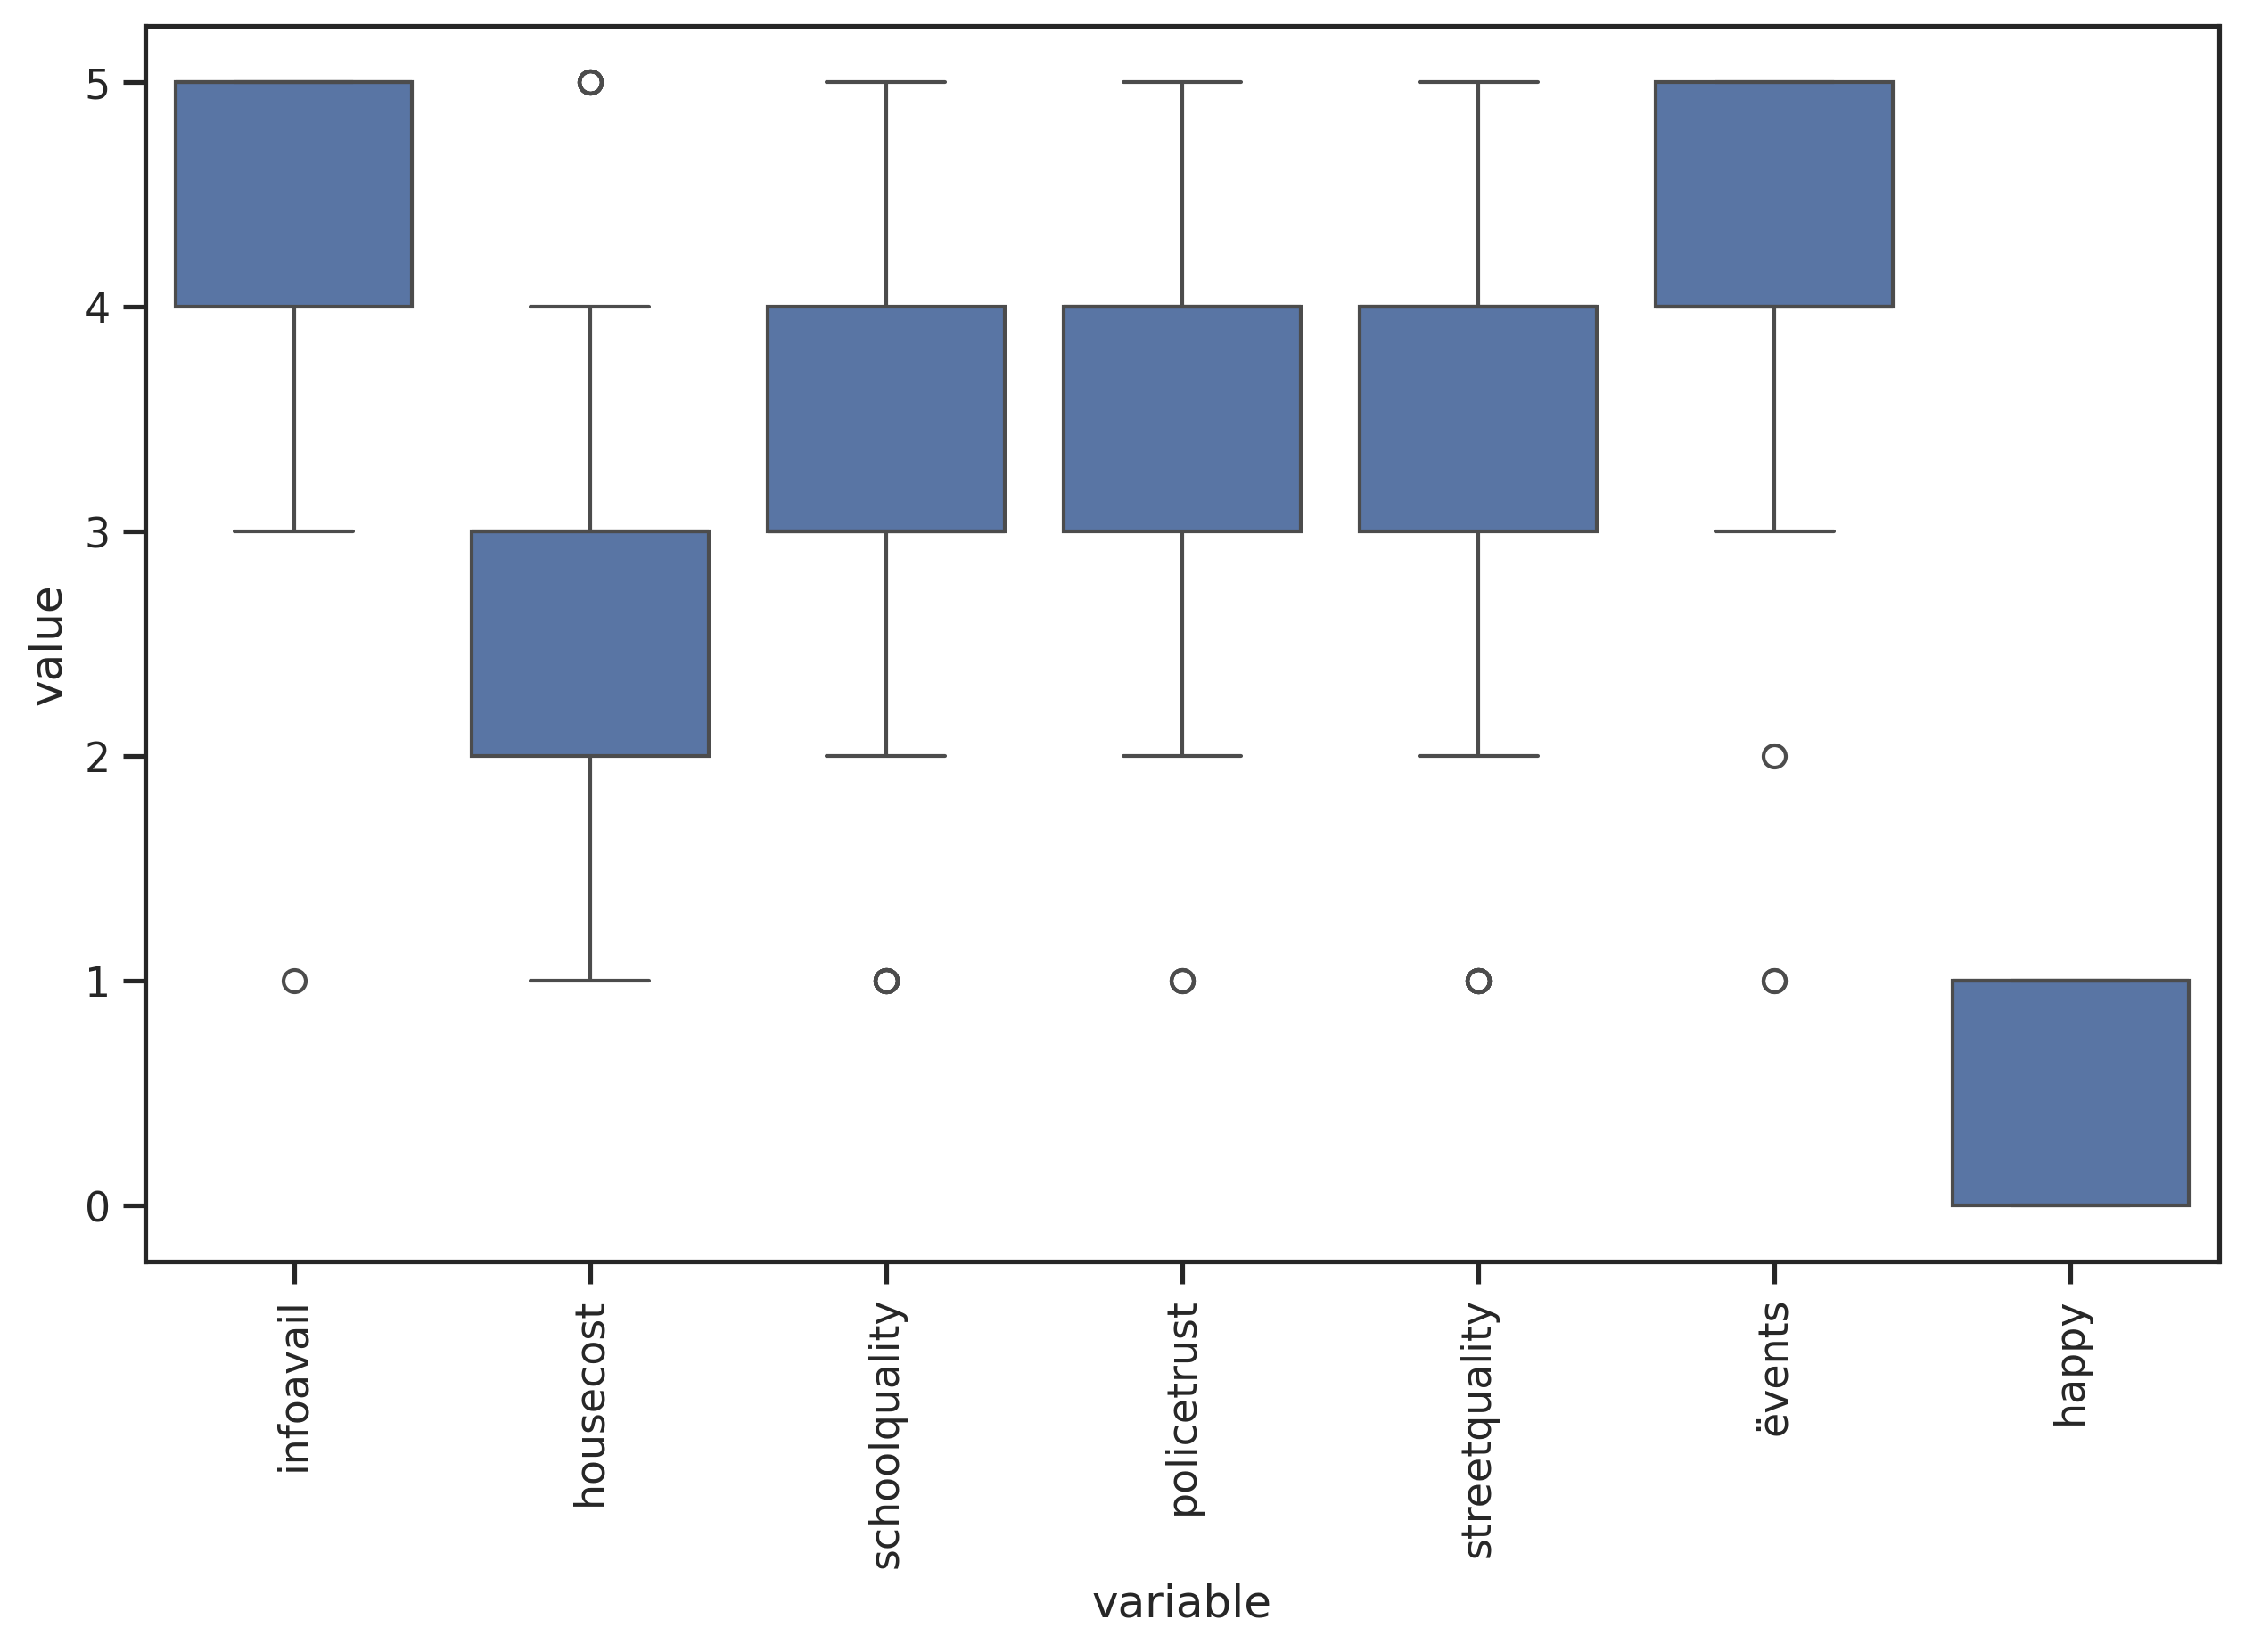

In [33]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
fig = plt.figure(figsize=(10,6))
warnings.filterwarnings('ignore')
sns.boxplot(x='variable', y='value', data=pd.melt(df))
plt.xticks(rotation=90)

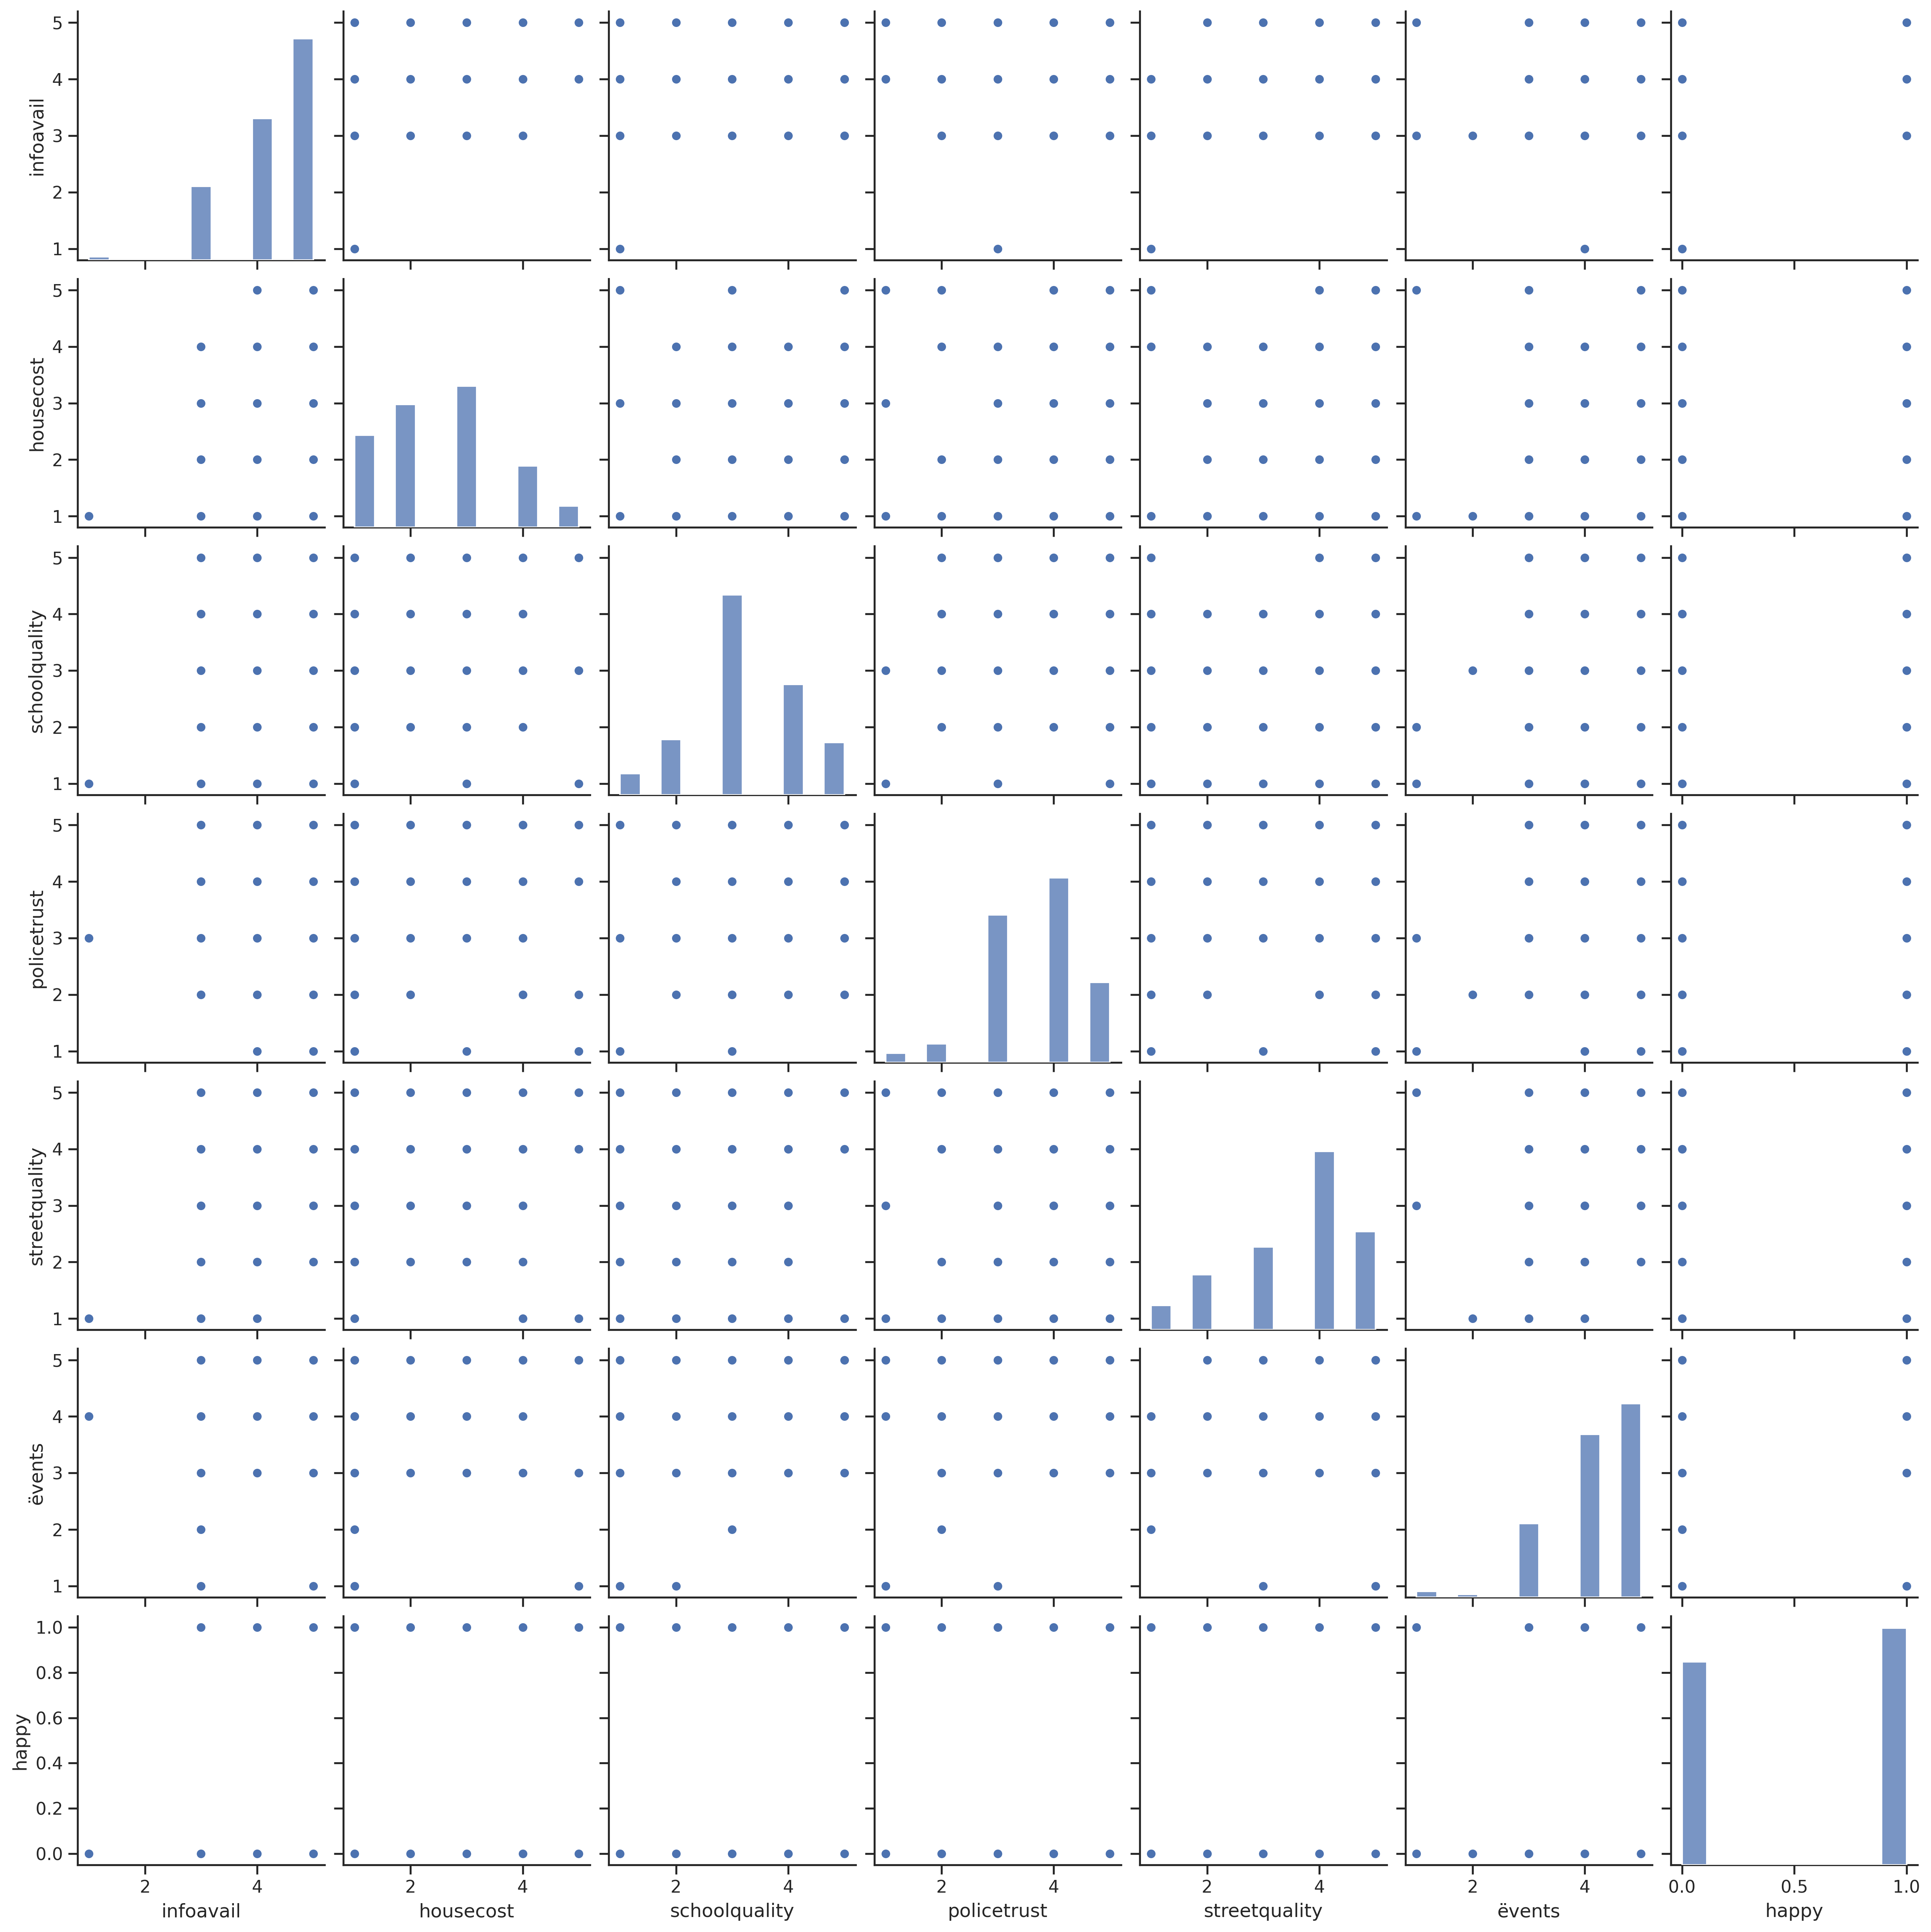

In [34]:
sns.pairplot(df)

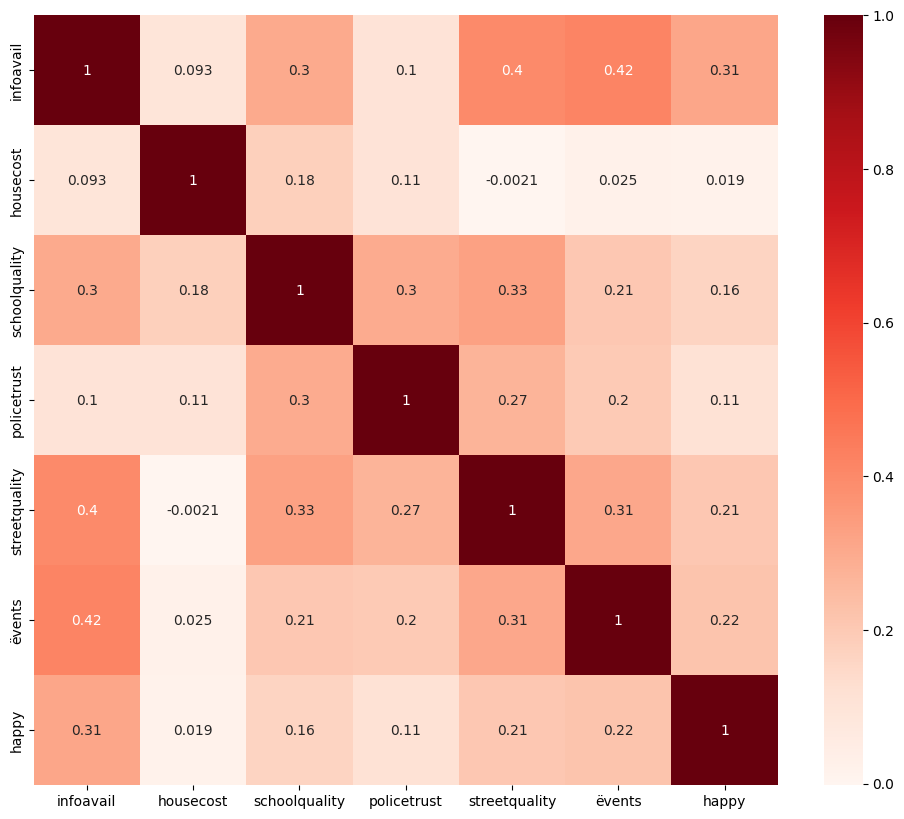

In [7]:
#Feature Selection Process:
#1-Heatmap Plot
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#2-Correlation with output variable
cor_target = abs(cor["happy"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.015]
relevant_features

infoavail        0.312740
housecost        0.019368
schoolquality    0.163639
policetrust      0.113356
streetquality    0.206685
ëvents           0.220729
happy            1.000000
Name: happy, dtype: float64

In [10]:
from pycaret.anomaly import*
exp_1=setup(df,session_id=121, experiment_name='classification')

,Description,Value
0,Session id,121
1,Original data shape,"(143, 7)"
2,Transformed data shape,"(143, 7)"
3,Numeric features,7
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [11]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'happy')
best_model = compare_models()

,Description,Value
0,Session id,3340
1,Target,happy
2,Target type,Binary
3,Original data shape,"(143, 7)"
4,Transformed data shape,"(143, 7)"
5,Transformed train set shape,"(100, 7)"
6,Transformed test set shape,"(43, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6700,0.6723,0.6600,0.7395,0.6685,0.3383,0.3548,0.0530
knn,K Neighbors Classifier,0.6300,0.6135,0.7100,0.6257,0.6634,0.2462,0.2524,0.0800
lightgbm,Light Gradient Boosting Machine,0.6300,0.6912,0.6433,0.6867,0.6525,0.2512,0.2622,0.2490
xgboost,Extreme Gradient Boosting,0.6200,0.6952,0.6967,0.6346,0.6531,0.2361,0.2525,0.0610
lr,Logistic Regression,0.6100,0.6518,0.6633,0.6539,0.6497,0.1989,0.2071,0.5570
gbc,Gradient Boosting Classifier,0.6100,0.6534,0.6800,0.6365,0.6449,0.2104,0.2189,0.1230
ridge,Ridge Classifier,0.6000,0.6434,0.6467,0.6489,0.6370,0.1820,0.1913,0.0590
ada,Ada Boost Classifier,0.6000,0.6214,0.6467,0.6500,0.6241,0.1965,0.2170,0.1210
lda,Linear Discriminant Analysis,0.6000,0.6476,0.6467,0.6489,0.6370,0.1820,0.1913,0.0350
nb,Naive Bayes,0.5700,0.6572,0.6400,0.5934,0.6096,0.1136,0.1091,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**After Balancing the data (SMOTE)**

In [13]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'happy', fix_imbalance = True)

,Description,Value
0,Session id,5874
1,Target,happy
2,Target type,Binary
3,Original data shape,"(143, 7)"
4,Transformed data shape,"(151, 7)"
5,Transformed train set shape,"(108, 7)"
6,Transformed test set shape,"(43, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [14]:
#after Data balancing
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5900,0.6357,0.5800,0.6255,0.5830,0.1923,0.1968,0.1320
xgboost,Extreme Gradient Boosting,0.5800,0.6149,0.6333,0.5910,0.5945,0.1561,0.1666,0.0650
rf,Random Forest Classifier,0.5500,0.6109,0.6367,0.5633,0.5890,0.0863,0.0952,0.3100
nb,Naive Bayes,0.5400,0.5357,0.5933,0.5939,0.5686,0.0678,0.0907,0.0430
gbc,Gradient Boosting Classifier,0.5400,0.5626,0.6500,0.5611,0.5859,0.0584,0.0666,0.1330
et,Extra Trees Classifier,0.5400,0.5922,0.6367,0.5623,0.5829,0.0694,0.0829,0.1770
lr,Logistic Regression,0.5300,0.5417,0.6133,0.5563,0.5759,0.0350,0.0404,0.0490
dt,Decision Tree Classifier,0.5300,0.5539,0.5933,0.6046,0.5633,0.0350,0.0537,0.0720
ridge,Ridge Classifier,0.5200,0.5259,0.5967,0.5463,0.5622,0.0200,0.0246,0.0660
lda,Linear Discriminant Analysis,0.5100,0.5482,0.5767,0.5368,0.5486,-0.0000,0.0056,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]